In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.origin'] = 'lower'

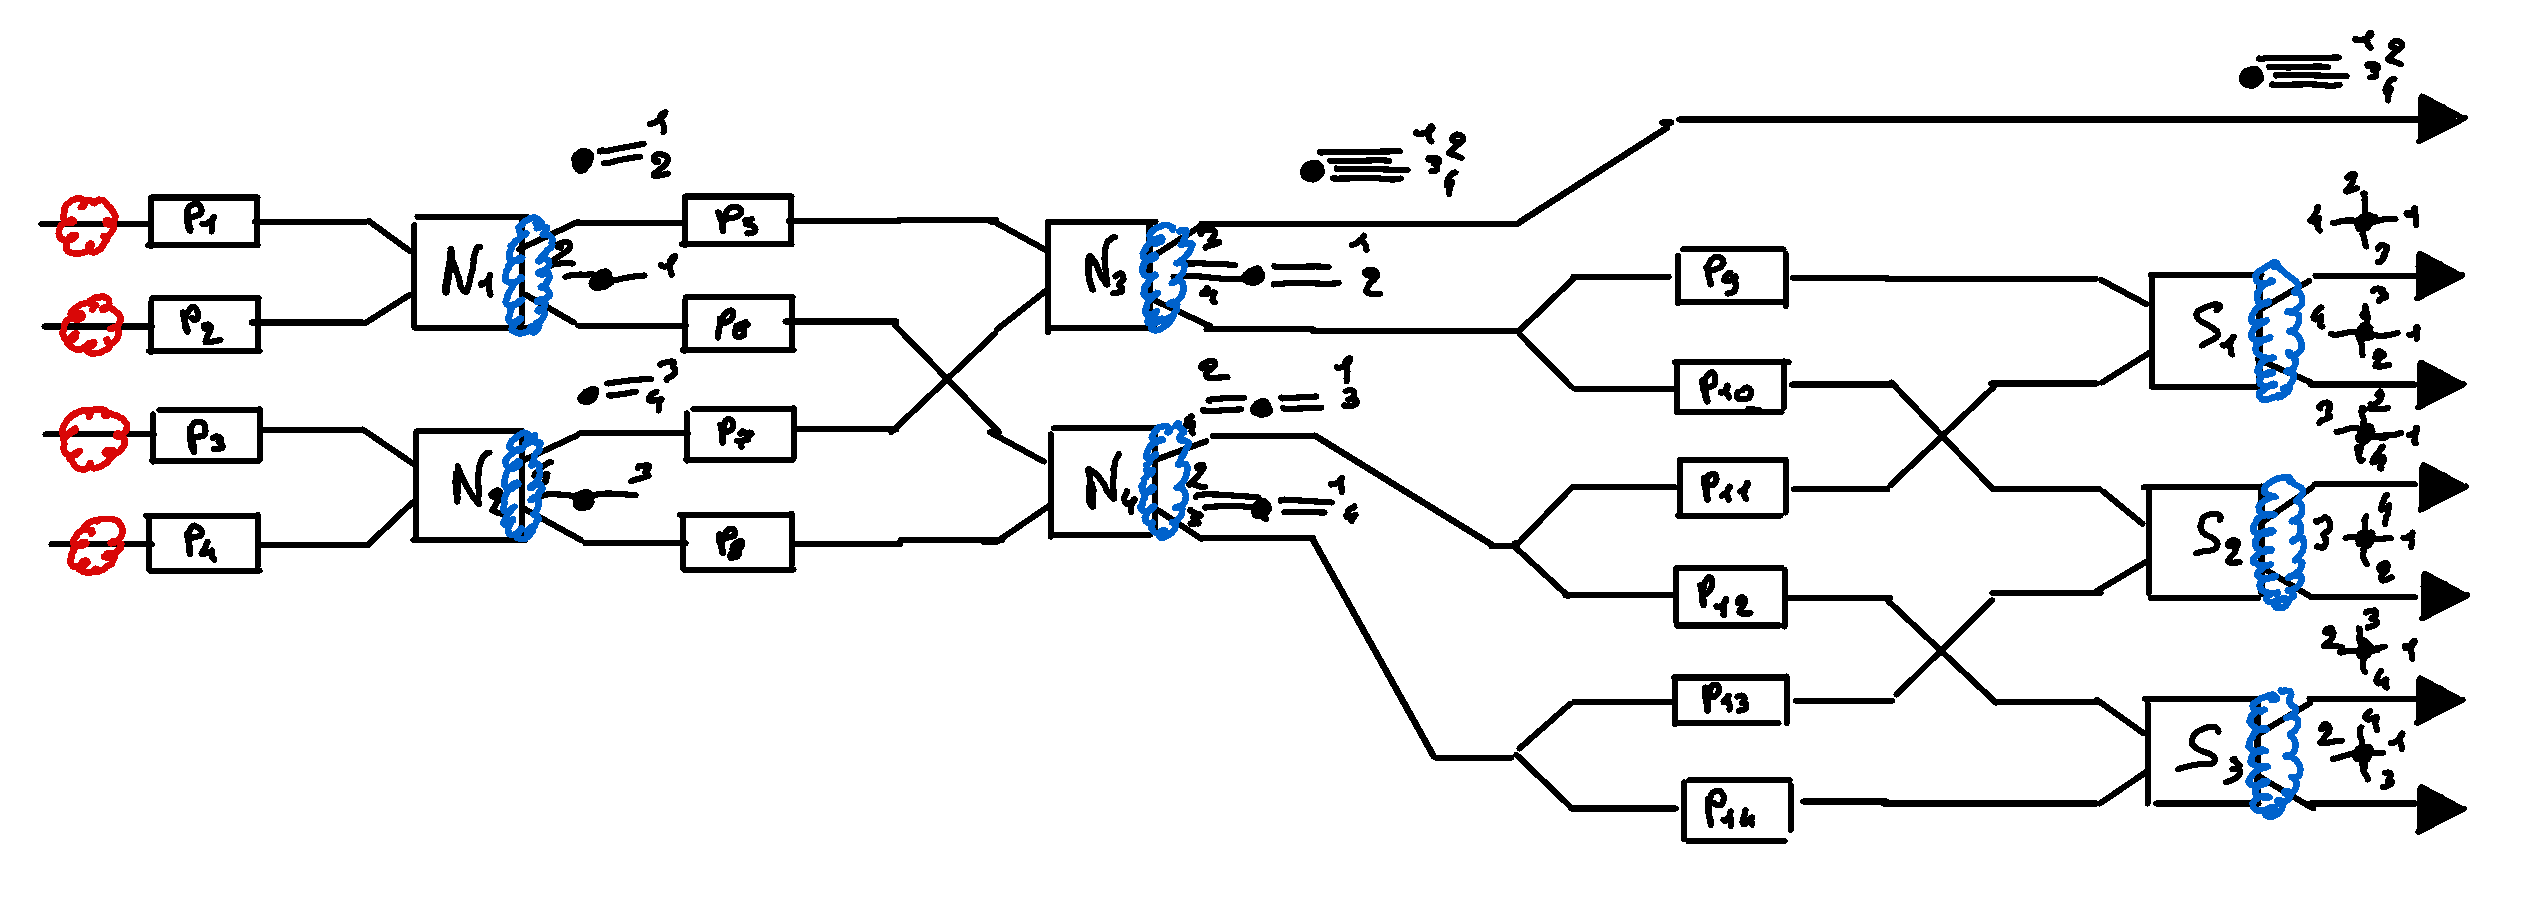

In [2]:
p = sp.IndexedBase('p') # perturbation + correction

alpha = sp.IndexedBase('alpha')
gamma = sp.IndexedBase('gamma')

o = sp.symbols('o', cls=sp.Idx) # origin (source) of the signal/aberation
n = sp.symbols('n', cls=sp.Idx) # channel number

c = sp.symbols('c', cls=sp.Idx) # component
i = sp.symbols('i', cls=sp.Idx) # index

theta = sp.symbols(r'\theta', real=True) # angle of the source

In [3]:
perturbation = alpha[c,i] * sp.exp(sp.I * gamma[c,i])
perturbation

exp(I*gamma[c, i])*alpha[c, i]

<div align=center>

---

# INPUT

</div>

4 input beams

In [4]:
x = sp.IndexedBase('x') # input signal
X = sp.Matrix([
    [x[1]],
    [x[2]],
    [x[3]],
    [x[4]]
])
X

Matrix([
[x[1]],
[x[2]],
[x[3]],
[x[4]]])

In [5]:
p_1_4 = sp.Matrix([
    [sp.exp(sp.I * p[1]), 0, 0, 0],
    [0, sp.exp(sp.I * p[2]), 0, 0],
    [0, 0, sp.exp(sp.I * p[3]), 0],
    [0, 0, 0, sp.exp(sp.I * p[4])]
])
p_1_4

Matrix([
[exp(I*p[1]),           0,           0,           0],
[          0, exp(I*p[2]),           0,           0],
[          0,           0, exp(I*p[3]),           0],
[          0,           0,           0, exp(I*p[4])]])

<div align=center>

---

# NULLER

</div>

## First Layer

In [6]:
Nlayer = 1/sp.sqrt(2) * sp.Matrix([
    [1,  1,  0,  0],
    [1, -1,  0,  0],
    [0,  0,  1,  1],
    [0,  0,  1, -1]
])
Nlayer

Matrix([
[sqrt(2)/2,  sqrt(2)/2,         0,          0],
[sqrt(2)/2, -sqrt(2)/2,         0,          0],
[        0,          0, sqrt(2)/2,  sqrt(2)/2],
[        0,          0, sqrt(2)/2, -sqrt(2)/2]])

Check if the nuller is physical

In [7]:
sp.conjugate(Nlayer).T * Nlayer

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [8]:
p_5_8 = sp.Matrix([
    [sp.exp(sp.I * p[5]), 0, 0, 0],
    [0, sp.exp(sp.I * p[6]), 0, 0],
    [0, 0, sp.exp(sp.I * p[7]), 0],
    [0, 0, 0, sp.exp(sp.I * p[8])]
])
p_5_8

Matrix([
[exp(I*p[5]),           0,           0,           0],
[          0, exp(I*p[6]),           0,           0],
[          0,           0, exp(I*p[7]),           0],
[          0,           0,           0, exp(I*p[8])]])

## Second layer

Channel 2 & 3 invertion

In [9]:
invert_2_3 = sp.Matrix([
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1]
])

In [10]:
sp.conjugate(invert_2_3).T * invert_2_3

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

Overall nuller without perturbations

In [11]:
N = Nlayer * invert_2_3 * Nlayer
N

Matrix([
[1/2,  1/2,  1/2,  1/2],
[1/2,  1/2, -1/2, -1/2],
[1/2, -1/2,  1/2, -1/2],
[1/2, -1/2, -1/2,  1/2]])

In [12]:
sp.conjugate(N).T * N

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

<div align=center>

---

# SPLIT & MIX

</div>

Beam splitters

In [13]:
splitters = 1/sp.sqrt(2) * sp.Matrix([
    [sp.sqrt(2), 0, 0, 0],
    [0, 1, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 1]
])
splitters

Matrix([
[1,         0,         0,         0],
[0, sqrt(2)/2,         0,         0],
[0, sqrt(2)/2,         0,         0],
[0,         0, sqrt(2)/2,         0],
[0,         0, sqrt(2)/2,         0],
[0,         0,         0, sqrt(2)/2],
[0,         0,         0, sqrt(2)/2]])

In [14]:
sp.conjugate(splitters).T * splitters

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [15]:
p_9_14 = sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0],
    [0, sp.exp(sp.I * p[9]), 0, 0, 0, 0, 0],
    [0, 0, sp.exp(sp.I * p[10]), 0, 0, 0, 0],
    [0, 0, 0, sp.exp(sp.I * p[11]), 0, 0, 0],
    [0, 0, 0, 0, sp.exp(sp.I * p[12]), 0, 0],
    [0, 0, 0, 0, 0, sp.exp(sp.I * p[13]), 0],
    [0, 0, 0, 0, 0, 0, sp.exp(sp.I * p[14])],
])
p_9_14

Matrix([
[1,           0,            0,            0,            0,            0,            0],
[0, exp(I*p[9]),            0,            0,            0,            0,            0],
[0,           0, exp(I*p[10]),            0,            0,            0,            0],
[0,           0,            0, exp(I*p[11]),            0,            0,            0],
[0,           0,            0,            0, exp(I*p[12]),            0,            0],
[0,           0,            0,            0,            0, exp(I*p[13]),            0],
[0,           0,            0,            0,            0,            0, exp(I*p[14])]])

2-3 and 4-5 invertion

In [16]:
invert_23_45 = sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 1]
])
invert_23_45

Matrix([
[1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 1]])

In [17]:
sp.conjugate(invert_23_45).T * invert_23_45

Matrix([
[1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1]])

Split & Mix

In [18]:
theta = sp.pi / 2
Slayer = 1/sp.sqrt(2) * sp.Matrix([
    [sp.sqrt(2), 0, 0, 0, 0, 0, 0],
    [0, sp.exp(sp.I * theta/2), 0, sp.exp(-sp.I * theta/2), 0, 0, 0],
    [0, sp.exp(-sp.I * theta/2), 0, sp.exp(sp.I * theta/2), 0, 0, 0],
    [0, 0, sp.exp(sp.I * theta/2), 0, 0, sp.exp(-sp.I * theta/2), 0],
    [0, 0, sp.exp(-sp.I * theta/2), 0, 0, sp.exp(sp.I * theta/2), 0],
    [0, 0, 0, 0, sp.exp(sp.I * theta/2), 0, sp.exp(-sp.I * theta/2)],
    [0, 0, 0, 0, sp.exp(-sp.I * theta/2), 0, sp.exp(sp.I * theta/2)]
])
Slayer

Matrix([
[1,                      0,                      0,                      0,                      0,                      0,                      0],
[0,  sqrt(2)*exp(I*pi/4)/2,                      0, sqrt(2)*exp(-I*pi/4)/2,                      0,                      0,                      0],
[0, sqrt(2)*exp(-I*pi/4)/2,                      0,  sqrt(2)*exp(I*pi/4)/2,                      0,                      0,                      0],
[0,                      0,  sqrt(2)*exp(I*pi/4)/2,                      0,                      0, sqrt(2)*exp(-I*pi/4)/2,                      0],
[0,                      0, sqrt(2)*exp(-I*pi/4)/2,                      0,                      0,  sqrt(2)*exp(I*pi/4)/2,                      0],
[0,                      0,                      0,                      0,  sqrt(2)*exp(I*pi/4)/2,                      0, sqrt(2)*exp(-I*pi/4)/2],
[0,                      0,                      0,                      0, sqrt(2)*exp(-I*pi/4)/

In [19]:
sp.conjugate(Slayer).T * Slayer

Matrix([
[1,                  0,                  0,                  0,                  0,                  0,                  0],
[0,                  1,                  0, (1/2)*(-1)*I + I/2,                  0,                  0,                  0],
[0,                  0,                  1,                  0,                  0, (1/2)*(-1)*I + I/2,                  0],
[0, (1/2)*(-1)*I + I/2,                  0,                  1,                  0,                  0,                  0],
[0,                  0,                  0,                  0,                  1,                  0, (1/2)*(-1)*I + I/2],
[0,                  0, (1/2)*(-1)*I + I/2,                  0,                  0,                  1,                  0],
[0,                  0,                  0,                  0, (1/2)*(-1)*I + I/2,                  0,                  1]])

N'est physique que si $\theta = \frac{\pi}{2} (n+1) \rightarrow cos(\theta)=0$

In [20]:
S = Slayer * invert_23_45 * splitters
S

Matrix([
[1,                              0,                              0,                              0],
[0, exp(-I*pi/4)/2 + exp(I*pi/4)/2,                              0,                              0],
[0, exp(-I*pi/4)/2 + exp(I*pi/4)/2,                              0,                              0],
[0,                              0, exp(-I*pi/4)/2 + exp(I*pi/4)/2,                              0],
[0,                              0, exp(-I*pi/4)/2 + exp(I*pi/4)/2,                              0],
[0,                              0,                              0, exp(-I*pi/4)/2 + exp(I*pi/4)/2],
[0,                              0,                              0, exp(-I*pi/4)/2 + exp(I*pi/4)/2]])

In [21]:
sp.conjugate(S).T * S

Matrix([
[1,                                     0,                                     0,                                     0],
[0, 2*(exp(-I*pi/4)/2 + exp(I*pi/4)/2)**2,                                     0,                                     0],
[0,                                     0, 2*(exp(-I*pi/4)/2 + exp(I*pi/4)/2)**2,                                     0],
[0,                                     0,                                     0, 2*(exp(-I*pi/4)/2 + exp(I*pi/4)/2)**2]])

\begin{equation}
\begin{split}
\eta &= 2 \left(\frac{1}{2} + \frac{e^{-i\theta}}{2}\right)\left(\frac{e^{i\theta}}{2} + \frac{1}{2} \right) \\
&= 2 * \left(\frac{e^{i\theta}}{4} + \frac{1}{4} + \frac{e^{-i\theta}}{4} + \frac{1}{4} \right) \\
&= \frac{1}{2} \left(2 + e^{i\theta} + e^{-i\theta} \right) \\
&= \frac{1}{2} \left(2 + 2 cos(\theta)\right) \\
&= 1 + cos(\theta)
\end{split}
\end{equation}

As the previous one, this matrix is then physical only if $\theta = \frac{\pi}{2} (n+1) \rightarrow cos(\theta)=0$

<div align=center>

---

# KERNEL

</div>

In [22]:
K = sp.Matrix([
    [1, 0, 0, 0, 0, 0, 0],
    [0, 1,-1, 0, 0, 0, 0],
    [0, 0, 0, 1,-1, 0, 0],
    [0, 0, 0, 0, 0, 1,-1],
])
K

Matrix([
[1, 0,  0, 0,  0, 0,  0],
[0, 1, -1, 0,  0, 0,  0],
[0, 0,  0, 1, -1, 0,  0],
[0, 0,  0, 0,  0, 1, -1]])

As the kernel creation process is fully numeric, there is no need to check if it is physical or not.

<div align=center>

---

# OVERALL MATRIX

</div>

In [23]:
M = Slayer * invert_23_45 * p_9_14 * splitters * Nlayer * invert_2_3 * p_5_8 * Nlayer * p_1_4
M

Matrix([
[                                                           exp(I*p[1])*exp(I*p[5])/2,                                                             exp(I*p[2])*exp(I*p[5])/2,                                                             exp(I*p[3])*exp(I*p[7])/2,                                                             exp(I*p[4])*exp(I*p[7])/2],
[ (exp(-I*pi/4)*exp(I*p[10])/2 + exp(I*pi/4)*exp(I*p[9])/2)*exp(I*p[1])*exp(I*p[5])/2,   (exp(-I*pi/4)*exp(I*p[10])/2 + exp(I*pi/4)*exp(I*p[9])/2)*exp(I*p[2])*exp(I*p[5])/2,  -(exp(-I*pi/4)*exp(I*p[10])/2 + exp(I*pi/4)*exp(I*p[9])/2)*exp(I*p[3])*exp(I*p[7])/2,  -(exp(-I*pi/4)*exp(I*p[10])/2 + exp(I*pi/4)*exp(I*p[9])/2)*exp(I*p[4])*exp(I*p[7])/2],
[ (exp(I*pi/4)*exp(I*p[10])/2 + exp(-I*pi/4)*exp(I*p[9])/2)*exp(I*p[1])*exp(I*p[5])/2,   (exp(I*pi/4)*exp(I*p[10])/2 + exp(-I*pi/4)*exp(I*p[9])/2)*exp(I*p[2])*exp(I*p[5])/2,  -(exp(I*pi/4)*exp(I*p[10])/2 + exp(-I*pi/4)*exp(I*p[9])/2)*exp(I*p[3])*exp(I*p[7])/2,  -(exp(I*pi/4)*exp(I*p[10])/2 + 

Transfer functions

In [24]:
f = M * X
f

Matrix([
[                                                                                                                                                                                                                                            exp(I*p[1])*exp(I*p[5])*x[1]/2 + exp(I*p[2])*exp(I*p[5])*x[2]/2 + exp(I*p[3])*exp(I*p[7])*x[3]/2 + exp(I*p[4])*exp(I*p[7])*x[4]/2],
[    (exp(-I*pi/4)*exp(I*p[10])/2 + exp(I*pi/4)*exp(I*p[9])/2)*exp(I*p[1])*exp(I*p[5])*x[1]/2 + (exp(-I*pi/4)*exp(I*p[10])/2 + exp(I*pi/4)*exp(I*p[9])/2)*exp(I*p[2])*exp(I*p[5])*x[2]/2 - (exp(-I*pi/4)*exp(I*p[10])/2 + exp(I*pi/4)*exp(I*p[9])/2)*exp(I*p[3])*exp(I*p[7])*x[3]/2 - (exp(-I*pi/4)*exp(I*p[10])/2 + exp(I*pi/4)*exp(I*p[9])/2)*exp(I*p[4])*exp(I*p[7])*x[4]/2],
[    (exp(I*pi/4)*exp(I*p[10])/2 + exp(-I*pi/4)*exp(I*p[9])/2)*exp(I*p[1])*exp(I*p[5])*x[1]/2 + (exp(I*pi/4)*exp(I*p[10])/2 + exp(-I*pi/4)*exp(I*p[9])/2)*exp(I*p[2])*exp(I*p[5])*x[2]/2 - (exp(I*pi/4)*exp(I*p[10])/2 + exp(-I*pi/4)*exp(I*p[9])/2)*exp(I*p[

In [25]:
to_eval = []
for i in f:
    to_eval.append(str(sp.simplify(i)))
    print(to_eval[-1])

exp(I*(p[1] + p[5]))*x[1]/2 + exp(I*(p[2] + p[5]))*x[2]/2 + exp(I*(p[3] + p[7]))*x[3]/2 + exp(I*(p[4] + p[7]))*x[4]/2


(-1)**(3/4)*(exp(I*p[10]) + I*exp(I*p[9]))*(-exp(I*(p[1] + p[5]))*x[1] - exp(I*(p[2] + p[5]))*x[2] + exp(I*(p[3] + p[7]))*x[3] + exp(I*(p[4] + p[7]))*x[4])/4
(-1)**(3/4)*(I*exp(I*p[10]) + exp(I*p[9]))*(-exp(I*(p[1] + p[5]))*x[1] - exp(I*(p[2] + p[5]))*x[2] + exp(I*(p[3] + p[7]))*x[3] + exp(I*(p[4] + p[7]))*x[4])/4
(-1)**(3/4)*(I*exp(I*p[11]) + exp(I*p[12]))*(-exp(I*(p[1] + p[6]))*x[1] + exp(I*(p[2] + p[6]))*x[2] - exp(I*(p[3] + p[8]))*x[3] + exp(I*(p[4] + p[8]))*x[4])/4
(-1)**(3/4)*(exp(I*p[11]) + I*exp(I*p[12]))*(-exp(I*(p[1] + p[6]))*x[1] + exp(I*(p[2] + p[6]))*x[2] - exp(I*(p[3] + p[8]))*x[3] + exp(I*(p[4] + p[8]))*x[4])/4
(-1)**(3/4)*(I*exp(I*p[13]) + exp(I*p[14]))*(-exp(I*(p[1] + p[6]))*x[1] + exp(I*(p[2] + p[6]))*x[2] + exp(I*(p[3] + p[8]))*x[3] - exp(I*(p[4] + p[8]))*x[4])/4
(-1)**(3/4)*(exp(I*p[13]) + I*exp(I*p[14]))*(-exp(I*(p[1] + p[6]))*x[1] + exp(I*(p[2] + p[6]))*x[2] + exp(I*(p[3] + p[8]))*x[3] - exp(I*(p[4] + p[8]))*x[4])/4


In [26]:
def kn0(beams:np.array, shift_powers:np.array=None) -> tuple[complex, np.array, dict[np.array]]:
    x = [None] + list(beams)
    p = [None] + list(np.array(shift_powers) * np.pi)
    I = 1j
    exp = np.exp

    bright = eval(to_eval[0])
    dark1 = eval(to_eval[1])
    dark2 = eval(to_eval[2])
    dark3 = eval(to_eval[3])
    dark4 = eval(to_eval[4])
    dark5 = eval(to_eval[5])
    dark6 = eval(to_eval[6])
    
    return bright, np.array([dark1, dark2, dark3, dark4, dark5, dark6]), {}

In [27]:
star_light = np.array([
    1 * np.exp(0j),
    1 * np.exp(0j),
    1 * np.exp(0j),
    1 * np.exp(0j),
], dtype=complex)

planet_light = np.array([
    np.exp(1j * 0.10),
    np.exp(1j * -0.12),
    np.exp(1j * 0.05),
    np.exp(1j * -0.01),
], dtype=complex)

bright, dark, _ = kn0(star_light, shift_powers=[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0])

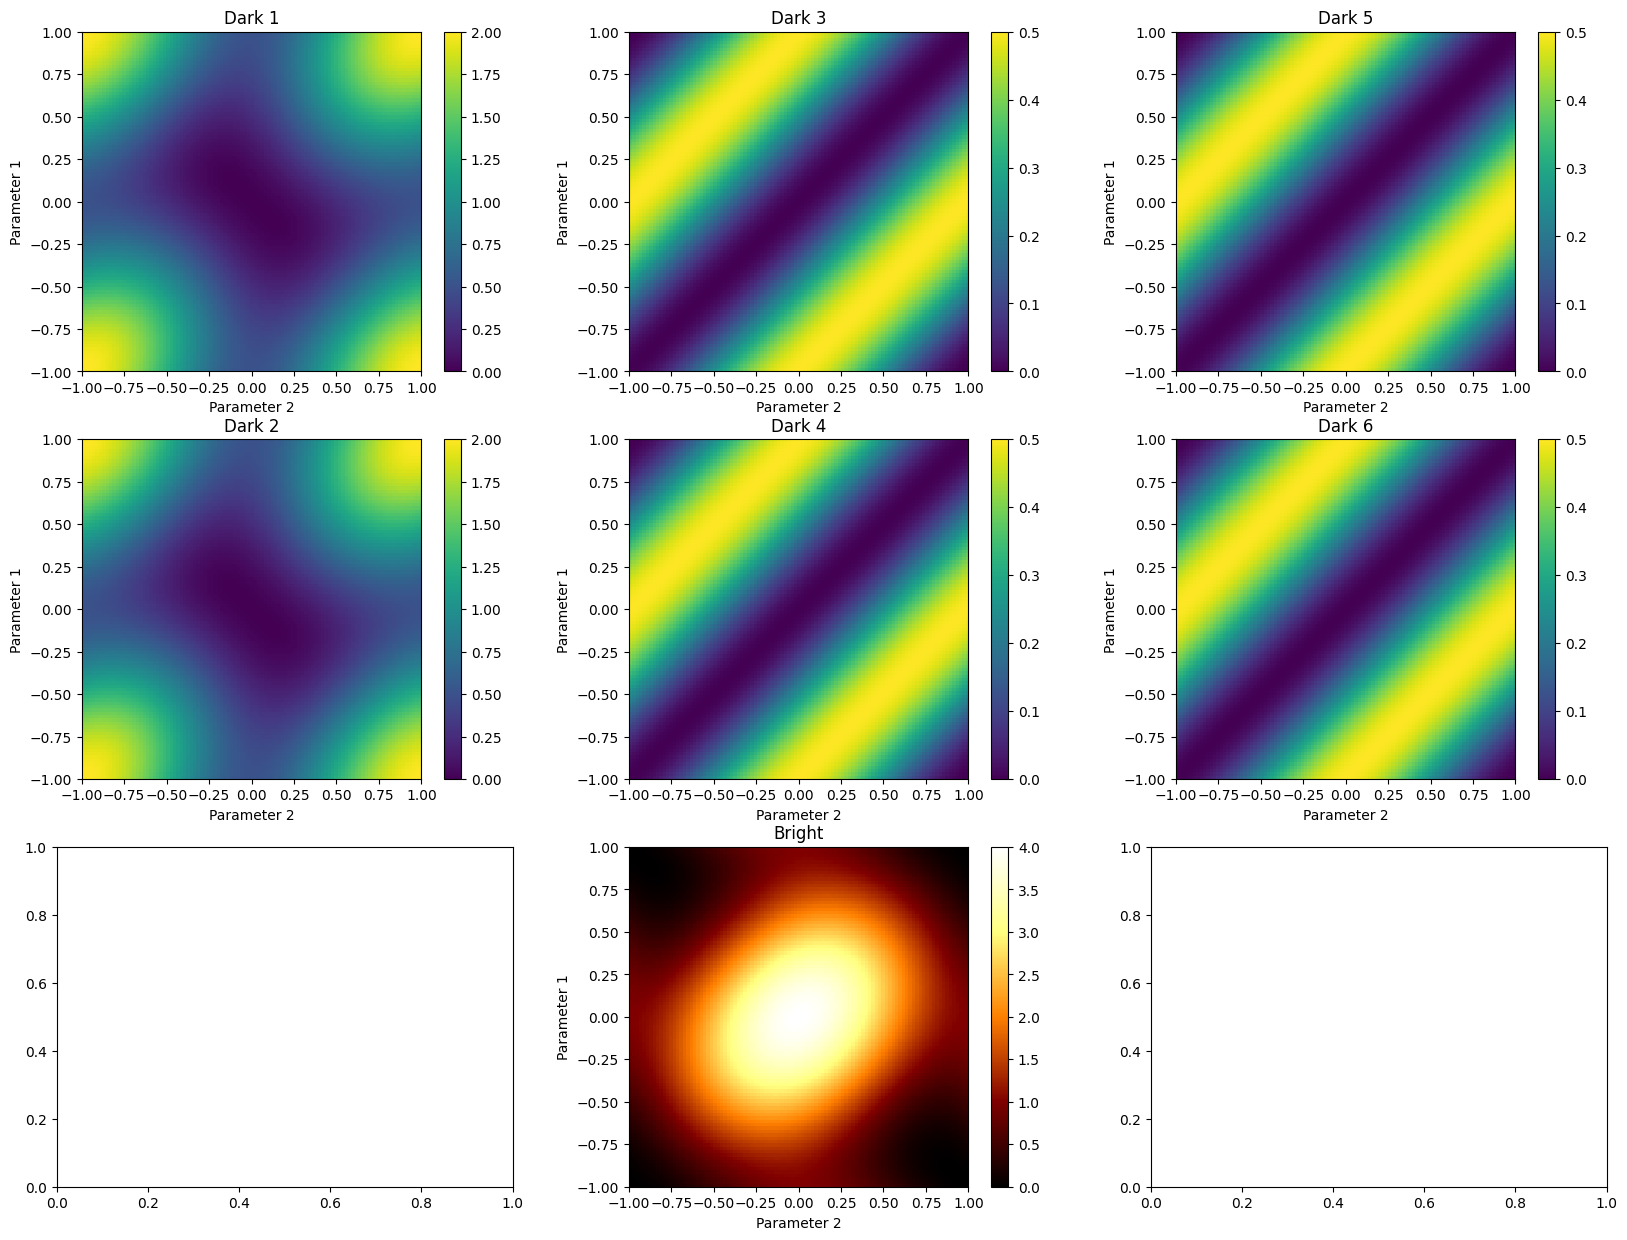

In [28]:
def scan():
    
    scan_on_parameters = (1,2) # Select 2 values from 1 to 14

    # Scan shift power parameter space
    scan = np.linspace(-1, 1, 101)
    null_depths = np.zeros((6, len(scan), len(scan)))
    brights = np.zeros((len(scan), len(scan)))
    fig, axs = plt.subplots(3,3, figsize=(20,15))

    for i, scan1 in enumerate(scan):
        for j, scan2 in enumerate(scan):
            parameters = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
            parameters[scan_on_parameters[0]-1] = scan1
            parameters[scan_on_parameters[1]-1] = scan2
            bright, darks, _ = kn0(star_light, parameters)
            for k, dark in enumerate(darks):
                null_depths[k,i,j] = np.abs(dark)**2 # np.log(np.abs(dark)**2 / np.abs(bright)**2)
                brights[i,j] = np.abs(bright)**2

    for k in range(6):
        p = axs[k%2, k//2]
        p.set_title(f"Dark {k+1}")
        im = p.imshow(null_depths[k], extent=[-1, 1, -1, 1])
        p.set_xlabel(f"Parameter {scan_on_parameters[1]}")
        p.set_ylabel(f"Parameter {scan_on_parameters[0]}")
        plt.colorbar(im)

    p = axs[2,1]
    p.set_title(f"Bright")
    im = p.imshow(brights, extent=[-1, 1, -1, 1], cmap="afmhot")
    p.set_xlabel(f"Parameter {scan_on_parameters[1]}")
    p.set_ylabel(f"Parameter {scan_on_parameters[0]}")
    plt.colorbar(im)
    
    plt.show()

scan()